# Worksheet 08

Name: Yingjie Ouyang  
UID: U86074230 

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
|------|--------------|
| A  B |      Y       |
| A  C |      N       |
| A  D |      N       |
| A  E |      N       |
| B  C |      Y       |
| B  D |      N       |
| B  E |      N       |
| C  D |      N       |
| C  E |      N       |
| D  E |      Y       |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

n(n-1)/2

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

9(9-1)/2 = 36

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

Cluster 1: 2(2-1)/2 = 1  
Cluster 2: 4(4-1)/2 = 6  

3 + 1 + 6 = 10 total agreements
C and P have 36 - 10 = 26 disagreements.

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

For each cluster number, use the formula to determine number of disagreements, which is equivalent to the disagreement distance.

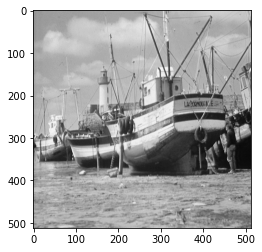

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

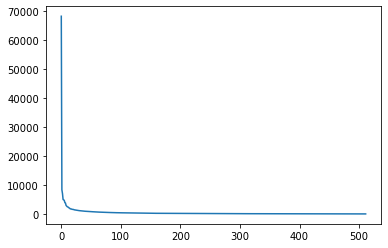

In [2]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(s)

Notice you can get the image back by multiplying the matrices back together:

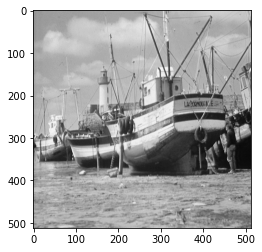

In [3]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [4]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

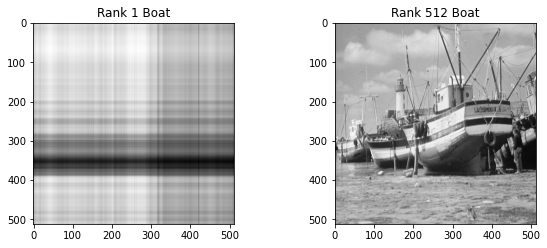

In [5]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

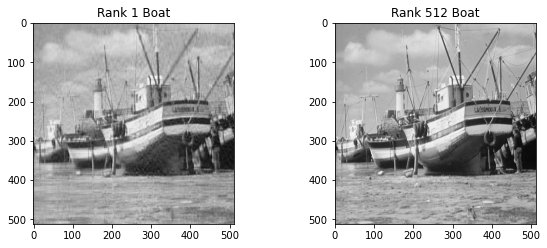

In [6]:
scopy2 = s.copy()
scopy2[40:] = 0.0

boat_app = u.dot(np.diag(scopy2)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

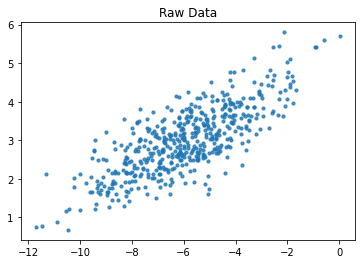

In [7]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

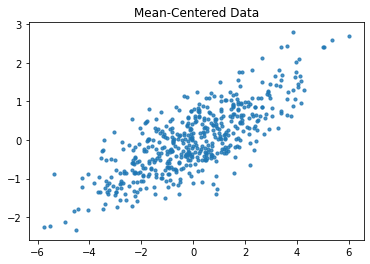

In [8]:
col1 = X[:, 0] - X[:, 0].mean()
col2 = X[:, 1] - X[:, 1].mean()
X_centered = np.array(list(zip(col1, col2)))
plt.scatter(X_centered[:, 0], X_centered[:, 1], s=10, alpha=0.8)
plt.title("Mean-Centered Data")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [9]:
u,s,vt=np.linalg.svd(X_centered,full_matrices=False)

Since we are plotting in 2-dimensions I expect there to be 2 singular values.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

It would lie on 0 in the plot since the data has been mean-centered.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

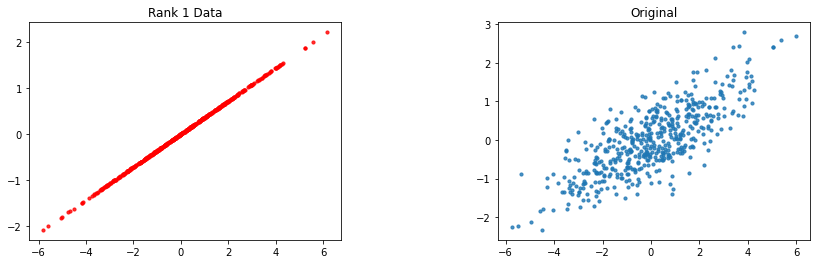

In [10]:
scopy = s.copy()
scopy[1:] = 0.0

X_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(X_app[:, 0], X_app[:, 1], s=10, alpha=0.8, c='red')
plt.title('Rank 1 Data')
plt.subplot(1,2,2)
plt.scatter(X_centered[:, 0], X_centered[:, 1], s=10, alpha=0.8)
plt.title('Original')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

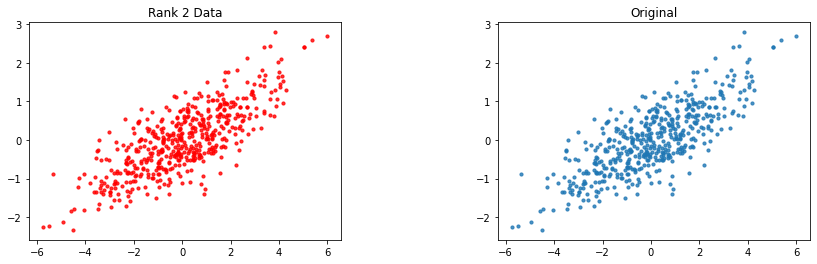

In [11]:
scopy2 = s.copy()
scopy2[2:] = 0.0

X_app = u.dot(np.diag(scopy2)).dot(vt)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(X_app[:, 0], X_app[:, 1], s=10, alpha=0.8, c='red')
plt.title('Rank 2 Data')
plt.subplot(1,2,2)
plt.scatter(X_centered[:, 0], X_centered[:, 1], s=10, alpha=0.8)
plt.title('Original')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

The data looks identical to the original. Thus, the rank of the matrix is indeed 2.